In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

In [3]:
# loading the data from csv file to a Pandas DataFrame
customer_data = pd.read_csv('../data/Mall_Customers.csv')

In [4]:
# first 5 rows in the dataframe
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
# Basic Data Info
print("\nData Information:")
print(customer_data.info())


Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [8]:
print("\nMissing Values:")
print(customer_data.isnull().sum())


Missing Values:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [11]:
label_encoder = LabelEncoder()
customer_data['Gender'] = label_encoder.fit_transform(customer_data['Gender'])

In [12]:
customer_data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [13]:
# Descriptive statistics of the data
print("\nDescriptive Statistics:")
print(customer_data.describe())



Descriptive Statistics:
       CustomerID      Gender         Age  Annual Income (k$)  \
count  200.000000  200.000000  200.000000          200.000000   
mean   100.500000    0.440000   38.850000           60.560000   
std     57.879185    0.497633   13.969007           26.264721   
min      1.000000    0.000000   18.000000           15.000000   
25%     50.750000    0.000000   28.750000           41.500000   
50%    100.500000    0.000000   36.000000           61.500000   
75%    150.250000    1.000000   49.000000           78.000000   
max    200.000000    1.000000   70.000000          137.000000   

       Spending Score (1-100)  
count              200.000000  
mean                50.200000  
std                 25.823522  
min                  1.000000  
25%                 34.750000  
50%                 50.000000  
75%                 73.000000  
max                 99.000000  


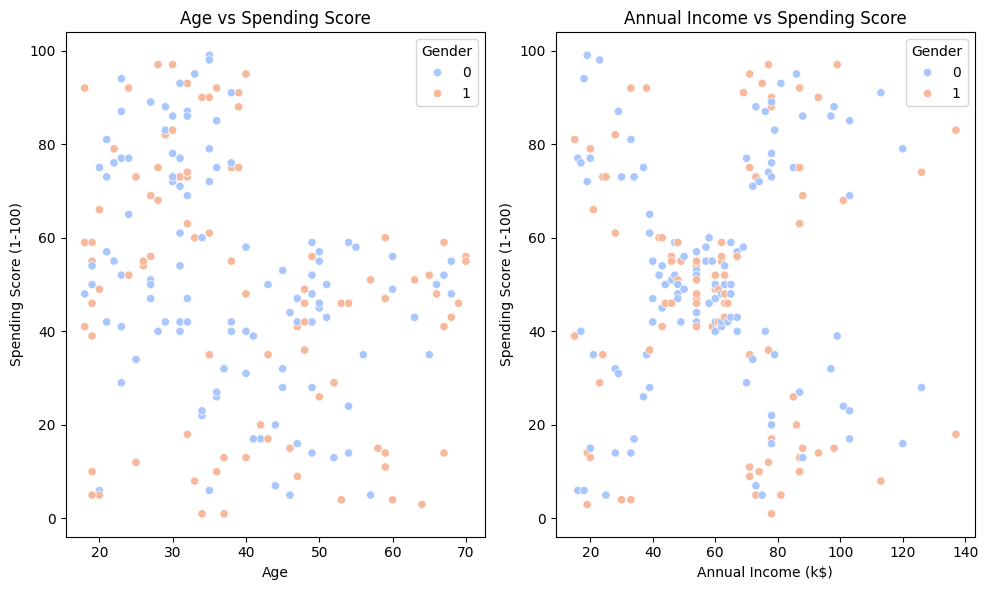

In [14]:
# Scatter plot to visualize relationships
plt.figure(figsize=(10, 6))

# Age vs Spending Score
plt.subplot(1, 2, 1)
sns.scatterplot(data=customer_data, x='Age', y='Spending Score (1-100)', hue='Gender', palette='coolwarm')
plt.title('Age vs Spending Score')

# Annual Income vs Spending Score
plt.subplot(1, 2, 2)
sns.scatterplot(data=customer_data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', palette='coolwarm')
plt.title('Annual Income vs Spending Score')

plt.tight_layout()
plt.show()



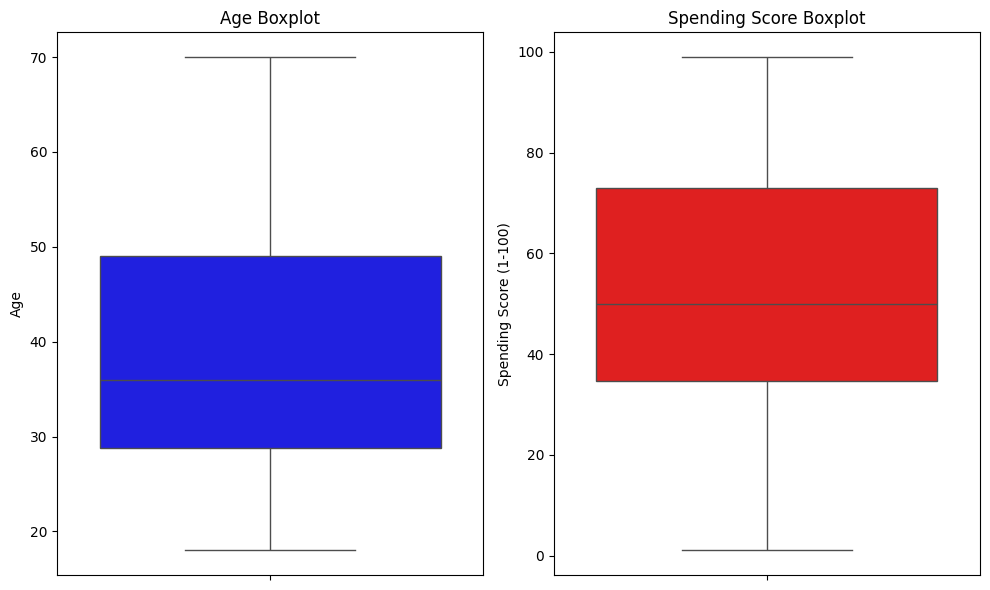

In [15]:
# Boxplot for checking outliers in Age and Spending Score
plt.figure(figsize=(10, 6))

# Age boxplot
plt.subplot(1, 2, 1)
sns.boxplot(customer_data['Age'], color='blue')
plt.title('Age Boxplot')

# Spending Score boxplot
plt.subplot(1, 2, 2)
sns.boxplot(customer_data['Spending Score (1-100)'], color='red')
plt.title('Spending Score Boxplot')

plt.tight_layout()
plt.show()



Gender Distribution:
Gender
0    112
1     88
Name: count, dtype: int64


C:\Users\rg999\AppData\Local\Temp\ipykernel_20492\3621057399.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=customer_data, palette='coolwarm')


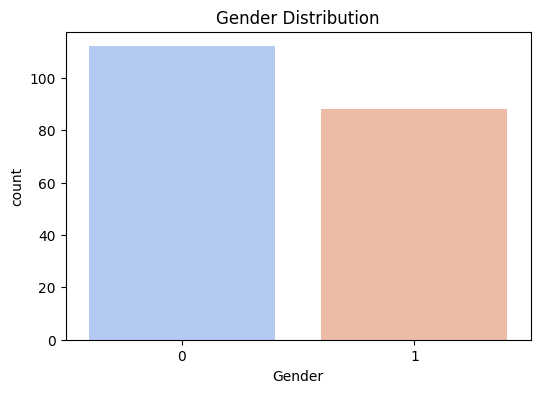

In [17]:
# Gender distribution
gender_counts = customer_data['Gender'].value_counts()
print("\nGender Distribution:")
print(gender_counts)

# Visualize Gender distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=customer_data, palette='coolwarm')
plt.title('Gender Distribution')
plt.show()



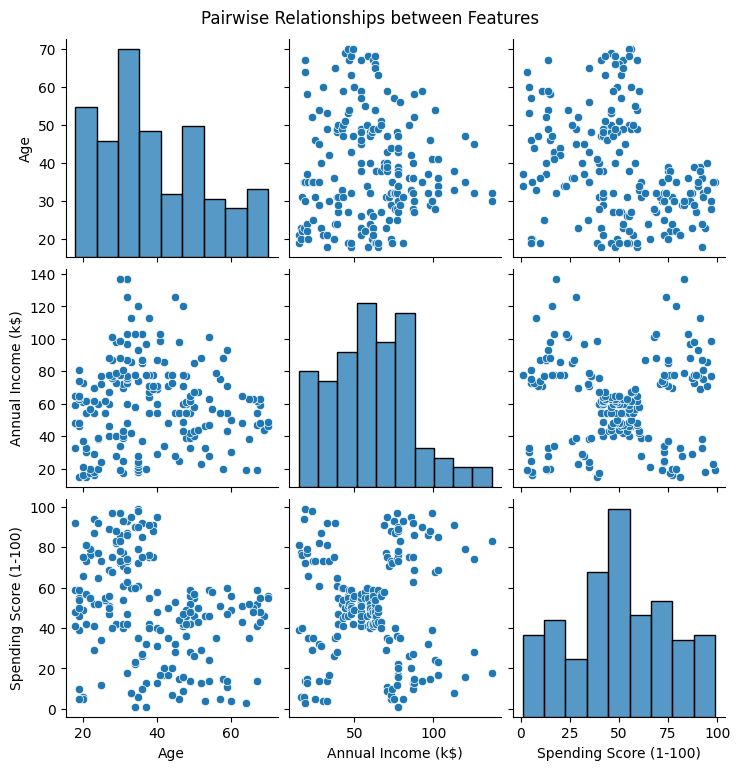

In [18]:

# Pairplot: Visualizing pairwise relationships between Age, Annual Income, and Spending Score
sns.pairplot(customer_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.suptitle('Pairwise Relationships between Features', y=1.02)
plt.show()



C:\Users\rg999\AppData\Local\Temp\ipykernel_20492\4029424616.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(customer_data['Annual Income (k$)'], shade=True, color='green')
C:\Users\rg999\AppData\Local\Temp\ipykernel_20492\4029424616.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(customer_data['Spending Score (1-100)'], shade=True, color='red')


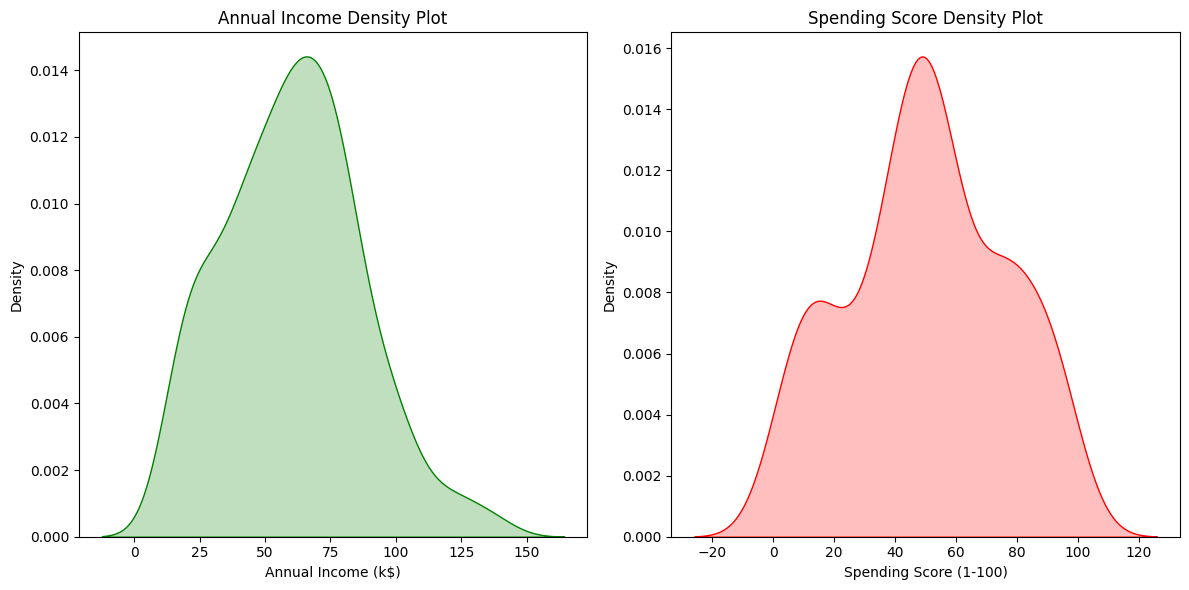

In [19]:
# Density Plot: Visualizing the distribution of Annual Income and Spending Score
plt.figure(figsize=(12, 6))

# Annual Income density plot
plt.subplot(1, 2, 1)
sns.kdeplot(customer_data['Annual Income (k$)'], shade=True, color='green')
plt.title('Annual Income Density Plot')

# Spending Score density plot
plt.subplot(1, 2, 2)
sns.kdeplot(customer_data['Spending Score (1-100)'], shade=True, color='red')
plt.title('Spending Score Density Plot')

plt.tight_layout()
plt.show()



C:\Users\rg999\AppData\Local\Temp\ipykernel_20492\2219886623.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Gender', y='Spending Score (1-100)', data=customer_data, palette='coolwarm')


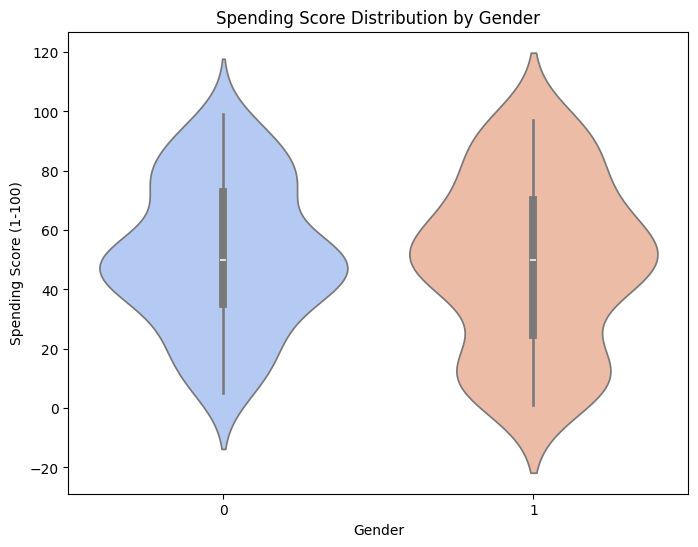

In [21]:
# Violin Plot: Distribution of Spending Score by Gender
plt.figure(figsize=(8, 6))
sns.violinplot(x='Gender', y='Spending Score (1-100)', data=customer_data, palette='coolwarm')
plt.title('Spending Score Distribution by Gender')
plt.show()



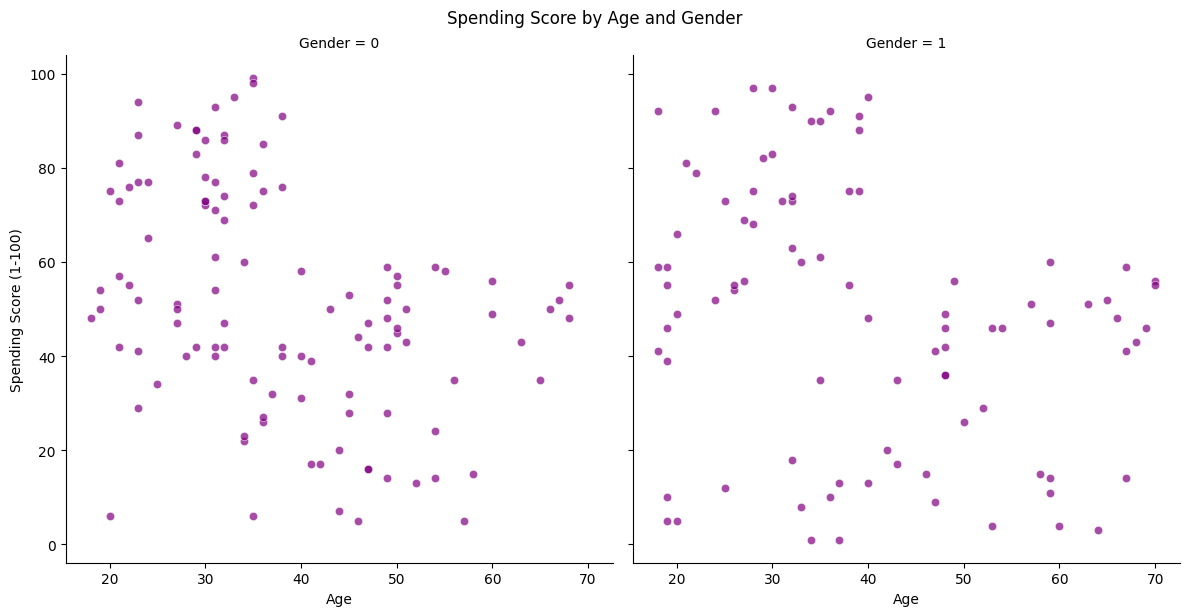

In [24]:
# FacetGrid: Visualizing Spending Score by Age and Annual Income
g = sns.FacetGrid(customer_data, col="Gender", height=6)
g.map(sns.scatterplot, 'Age', 'Spending Score (1-100)', alpha=.7, color='purple')
plt.suptitle('Spending Score by Age and Gender', y=1.02)
plt.show()